In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

ob_df = pd.read_csv("observations.csv")
print(ob_df.head())
sp_df = pd.read_csv("species_info.csv")
print(sp_df.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic 

In [6]:
#print(ob_df.describe())
#print(sp_df.describe())
print(ob_df.isna().sum())
print(sp_df.isna().sum())

scientific_name    0
park_name          0
observations       0
dtype: int64
category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64


In [7]:
# The scope of this project is to find any patterns to endangered species
# My current goal is to get the CVS data into a readable, clean data frame
# First challenge is investgating our N/A values
# Second challenge is our species table has 5824 unique scientific names but 23296 on the observation table
# We need the data about the species to be joined and mapped to our observations for proper data storage methodology
# The only missing data is under the conservation_status so we can predict this to be MNAR (missing not at random)

In [8]:
missing_data = sp_df[sp_df['conservation_status'].isna()]
conserv_data = sp_df[sp_df['conservation_status'].notna()]
print(missing_data.describe())
print(conserv_data.describe())

              category        scientific_name        common_names  \
count             5633                   5633                5633   
unique               7                   5363                5324   
top     Vascular Plant  Streptopelia decaocto  Brachythecium Moss   
freq              4424                      3                   7   

       conservation_status  
count                    0  
unique                   0  
top                    NaN  
freq                   NaN  
       category   scientific_name     common_names conservation_status
count       191               191              191                 191
unique        7               179              190                   4
top        Bird  Myotis lucifugus  Gray Wolf, Wolf  Species of Concern
freq         79                 3                2                 161


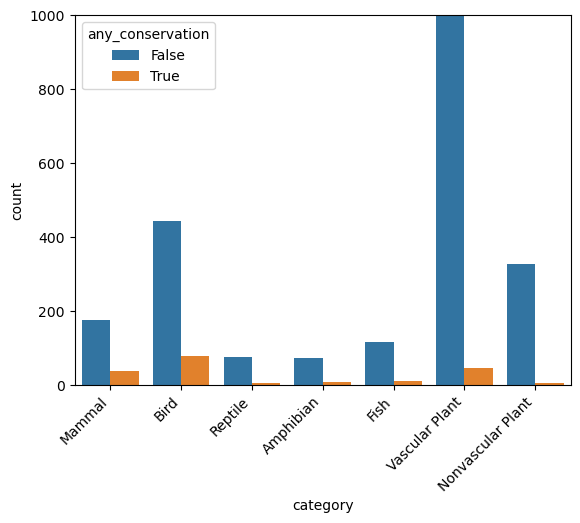

<Figure size 640x480 with 0 Axes>

In [20]:
# After seperating the data into with and without a conservation status, we can quickly see:
# 1) Bird is the most common category, 
# 2) Myotis lucifugus comes up 3 times, 
# 3) And there are 2 Gray Wolves in conservation status
# Let's create a new column indicating if the row is in conservation_status to keep 1 data frame and filter the data
sp_df['any_conservation'] = sp_df['conservation_status'].notna()
sns.countplot(data=sp_df, x='category', hue='any_conservation')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1000)
plt.show()
plt.clf()

In [24]:
# There is a overwhelmingly disproportion of data sets under the vascular plant category and are not in conservation status
# Let's invesigate this subet of data
df_vascular = sp_df[sp_df['category'] == 'Vascular Plant']
print(df_vascular.describe())

              category       scientific_name common_names conservation_status  \
count             4470                  4470         4470                  46   
unique               1                  4262         4291                   3   
top     Vascular Plant  Hypochaeris radicata  Panic Grass  Species of Concern   
freq              4470                     3            6                  43   

       any_conservation  
count              4470  
unique                2  
top               False  
freq               4424  


In [25]:
# It's hard to say how it is affecting the dataset
# I will add another column 'is_vascular_plant' to always be able to compare results with and without the data set
sp_df['is_vascular_plant'] = sp_df['category'] == 'Vascular Plant'
print(sp_df.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  \
0                           Gapper's Red-Backed Vole                 NaN   
1                              American Bison, Bison                 NaN   
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN   
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN   
4                                      Wapiti Or Elk                 NaN   

   any_conservation  is_vascular_plant  
0             False              False  
1             False              False  
2             False              False  
3             False              False  
4             False              False  


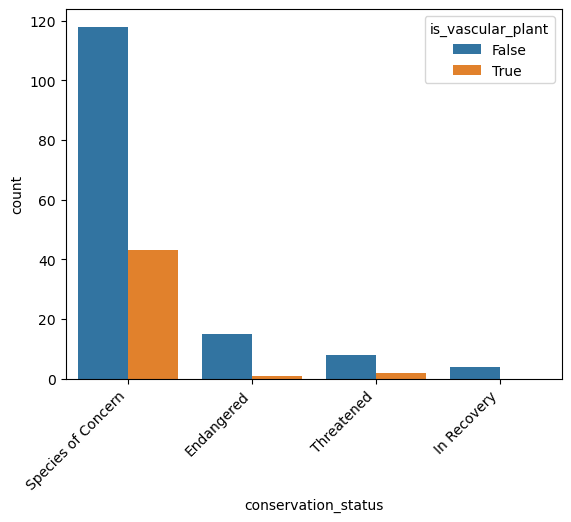

<Figure size 640x480 with 0 Axes>

In [29]:
sns.countplot(data=sp_df, x='conservation_status', hue='is_vascular_plant')
plt.xticks(rotation=45, ha='right')
plt.show()
plt.clf()

In [31]:
# I'm curious of any duplicate rows
print(ob_df.duplicated().sum())
print(sp_df.duplicated().sum())

15
0


In [36]:
# 15 in observations, which can be dealt with, and none in species
duplicates = ob_df[ob_df.duplicated(keep=False)]
print(duplicates)

              scientific_name                            park_name  \
365            Plantago major  Great Smoky Mountains National Park   
513             Arctium minus               Yosemite National Park   
627        Spilogale putorius            Yellowstone National Park   
1020     Eleocharis palustris  Great Smoky Mountains National Park   
1032      Hesperis matronalis                  Bryce National Park   
1454   Echinochloa crus-galli  Great Smoky Mountains National Park   
1635    Streptopelia decaocto            Yellowstone National Park   
4178     Monotropa hypopithys  Great Smoky Mountains National Park   
4527   Botrychium virginianum            Yellowstone National Park   
7219        Prunella vulgaris  Great Smoky Mountains National Park   
7263   Echinochloa crus-galli  Great Smoky Mountains National Park   
8710    Streptopelia decaocto            Yellowstone National Park   
10038          Plantago major  Great Smoky Mountains National Park   
10674           Arct

In [37]:
# Looks redundant, so we will drop the duplicates
ob_df = ob_df.drop_duplicates()
print(ob_df.duplicated().sum())

0


In [38]:
# I'm going to join the data frames now. Observations will be our left df and we will populate species using scientific_name as the key
full_df = pd.merge(ob_df, sp_df, on='scientific_name', how='left')
print(full_df.head())

            scientific_name                            park_name  \
0        Vicia benghalensis  Great Smoky Mountains National Park   
1            Neovison vison  Great Smoky Mountains National Park   
2         Prunus subcordata               Yosemite National Park   
3      Abutilon theophrasti                  Bryce National Park   
4  Githopsis specularioides  Great Smoky Mountains National Park   

   observations        category                        common_names  \
0            68  Vascular Plant  Purple Vetch, Reddish Tufted Vetch   
1            77          Mammal                       American Mink   
2           138  Vascular Plant                        Klamath Plum   
3            84  Vascular Plant                          Velvetleaf   
4            85  Vascular Plant                      Common Bluecup   

  conservation_status  any_conservation  is_vascular_plant  
0                 NaN             False               True  
1                 NaN             False   

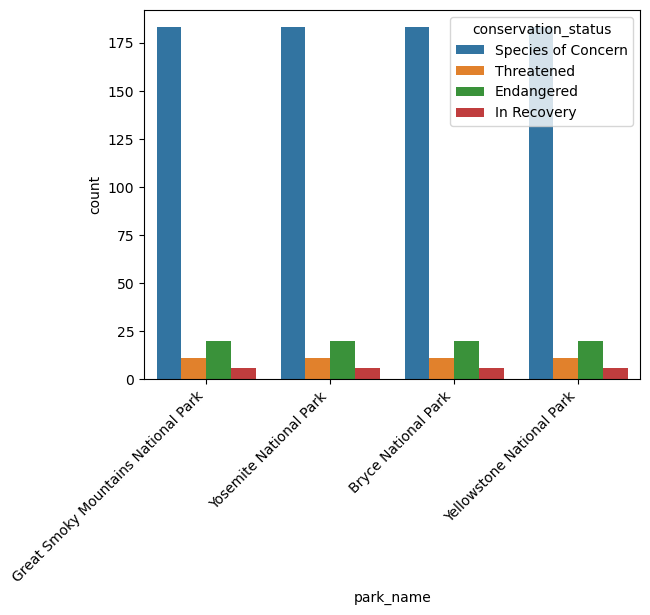

<Figure size 640x480 with 0 Axes>

In [42]:
sns.countplot(data=full_df, x='park_name', hue='conservation_status')
plt.xticks(rotation=45, ha='right')
#plt.ylim(0, 1000)
plt.show()
plt.clf()

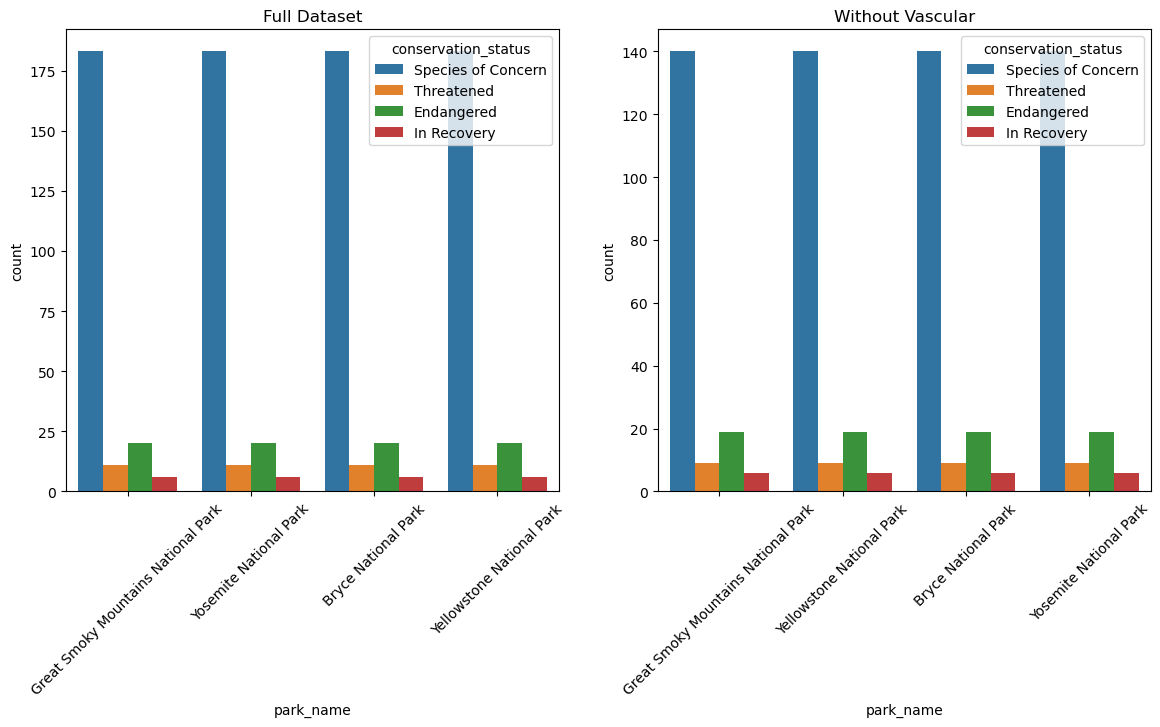

<Figure size 640x480 with 0 Axes>

In [47]:
# Conservation status proportions remain consistent across parks, indicating unifomity in the dataset.

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.countplot(data=full_df, x='park_name', hue='conservation_status', ax=axes[0])
axes[0].set_title('Full Dataset')
#plt.xticks(rotation=45, ha='right')
sns.countplot(data=full_df[full_df['is_vascular_plant'] == False], x='park_name', hue='conservation_status', ax=axes[1])
axes[1].set_title('Without Vascular')
for ax in axes:
    ax.tick_params(axis='x', rotation=45)
plt.show()
plt.clf()

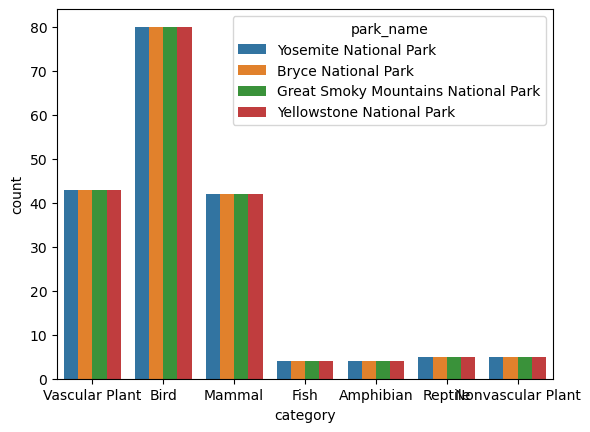

<Figure size 640x480 with 0 Axes>

In [49]:
# The comparison countplots demonstrate that Vascular Plants do not skew tha data in this way

of_concern = full_df[full_df['conservation_status'] == 'Species of Concern']
threatened = full_df[full_df['conservation_status'] == 'Threatened']
endangered = full_df[full_df['conservation_status'] == 'Endangered']
recovery = full_df[full_df['conservation_status'] == 'In Recovery']
#fig, axes = plt.subplots(2, 2, figsize=(14, 6))
sns.countplot(data=of_concern, x='category', hue='park_name')
              #ax=axes[0])
#axes[0].set_title('Full Dataset')
#sns.countplot(data=full_df[full_df['is_vascular_plant'] == False], x='categroy', hue='conservation_status', ax=axes[1])
#axes[1].set_title('Without Vascular')
#for ax in axes:
    #ax.tick_params(axis='x', rotation=45)
plt.show()
plt.clf()